In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import statsmodels.api as sm

# Data import

In [2]:
boats = {}
boats['name'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
boats['loa'] = [24, 24.71, 25.76, 26.64, 29.2, 30.45, 23.98, 22.17, 24, 26.5, 23.6, 22.64, 25.69, 26]
boats['lwl'] = [20.87, 20.63, 20.72, 21.20, 22.34, 26.48, 20.85, 19.28, 20.87, 23.99, 23.54, 22.05, 23.65, 22.61]
boats['beam'] = [6, 6.28, 6.12, 6.26, 6.7, 7.15, 6.57, 5.75, 6.05, 6.72, 5.55, 5.6, 6.45, 6.65]
boats['draft'] = [ None, 1.88, 1.92, 1.96, 2.20, 2.02, 1.83, 2.17, 1.8, 1.52, 1.64, 1.82, 1.75, 1.9]
boats['speed'] = [ 20, 30, 27, 27, 27, 26, 20.5, 24, 26, 24, 22, 30, 26, 22]
boats['displacement'] = [None,  75.9, 77.6, 79, 99, 105.5, 82.2, 51, 60, 69, 58, 53.3, 75, 80]

In [3]:
df = pd.DataFrame(boats)

In [4]:
df

,name,loa,lwl,beam,draft,speed,displacement
0,A,24.00,20.87,6.00,NaN,20.0,NaN
1,B,24.71,20.63,6.28,1.88,30.0,75.9
2,C,25.76,20.72,6.12,1.92,27.0,77.6
3,D,26.64,21.20,6.26,1.96,27.0,79.0
4,E,29.20,22.34,6.70,2.20,27.0,99.0
5,F,30.45,26.48,7.15,2.02,26.0,105.5
6,G,23.98,20.85,6.57,1.83,20.5,82.2
7,H,22.17,19.28,5.75,2.17,24.0,51.0
8,I,24.00,20.87,6.05,1.80,26.0,60.0
9,J,26.50,23.99,6.72,1.52,24.0,69.0


# Data visualization
## Scatter matrix plot

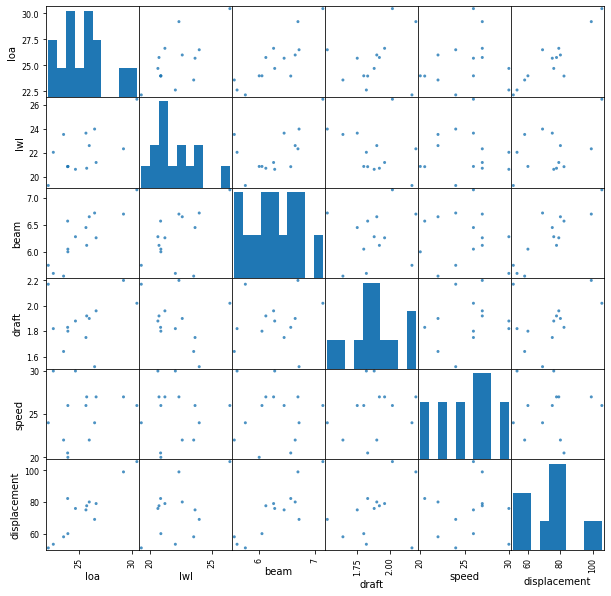

In [5]:
scatter_plot = pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10,10))

In [6]:
20*0.5144/(20.87*9.81)**0.5

0.7190104913097959

In [7]:
df['froude'] = (df['speed']*1852/3600)/(df['lwl']*9.81)**0.5
df['l_b'] = df['lwl']/df['beam']
df['l_t'] = df['lwl']/df['draft']
df['b_t'] = df['beam']/df['draft']
df

,name,loa,lwl,beam,draft,speed,displacement,froude,l_b,l_t,b_t
0,A,24.00,20.87,6.00,NaN,20.0,NaN,0.719073,3.478333,NaN,NaN
1,B,24.71,20.63,6.28,1.88,30.0,75.9,1.084865,3.285032,10.973404,3.340426
2,C,25.76,20.72,6.12,1.92,27.0,77.6,0.974256,3.385621,10.791667,3.187500
3,D,26.64,21.20,6.26,1.96,27.0,79.0,0.963163,3.386581,10.816327,3.193878
4,E,29.20,22.34,6.70,2.20,27.0,99.0,0.938266,3.334328,10.154545,3.045455
5,F,30.45,26.48,7.15,2.02,26.0,105.5,0.829886,3.703497,13.108911,3.539604
6,G,23.98,20.85,6.57,1.83,20.5,82.2,0.737403,3.173516,11.393443,3.590164
7,H,22.17,19.28,5.75,2.17,24.0,51.0,0.897763,3.353043,8.884793,2.649770
8,I,24.00,20.87,6.05,1.80,26.0,60.0,0.934794,3.449587,11.594444,3.361111
9,J,26.50,23.99,6.72,1.52,24.0,69.0,0.804822,3.569940,15.782895,4.421053


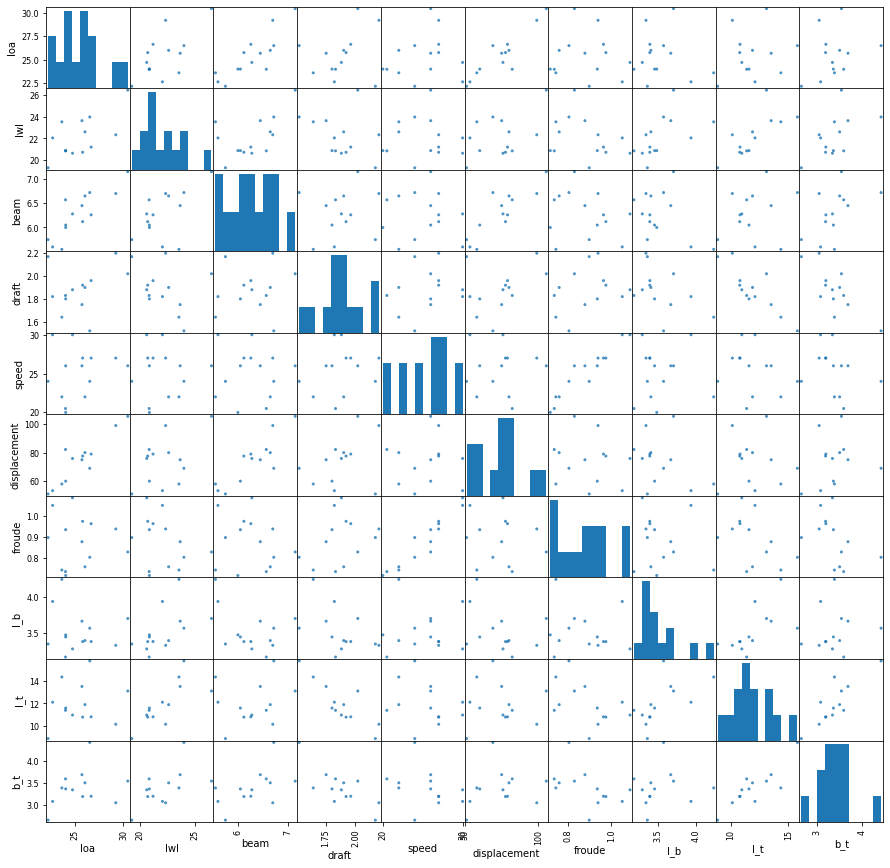

In [8]:
scatter_plot_ = pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(15,15))

## Froude vs L/B

In [9]:
x1 = df['froude'].values.reshape(-1, 1)
y1 = df['l_b'].values.reshape(-1, 1)
regr1 = linear_model.LinearRegression()
regr1.fit(x1, y1)
y1_pred = regr1.predict(x1)  # make predictions

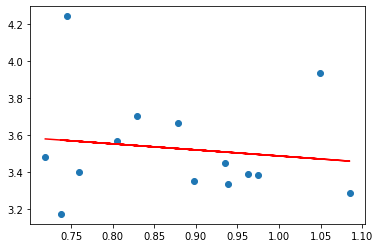

summary [3.81439499] [[-0.32772683]] 0.01850065000331469


In [10]:
plt.scatter(x1, y1)
plt.plot(x1, y1_pred, color='red')
plt.show()
print('summary', regr1.intercept_, regr1.coef_, regr1.score(x1, y1))

In [22]:
x1_ = df['froude'].values
x1_ = sm.add_constant(x1_)
y1_ = df['l_b'].values
st1 = sm.OLS(y1_, x1_)
st1 = st1.fit()
print(st1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.2262
Date:                Fri, 11 Nov 2022   Prob (F-statistic):              0.643
Time:                        09:23:17   Log-Likelihood:                -1.5792
No. Observations:                  14   AIC:                             7.158
Df Residuals:                      12   BIC:                             8.437
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8144      0.611      6.240      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


## Length overall vs displacement

In [12]:
df_corrected = df.dropna(subset=['displacement'])
df_corrected

,name,loa,lwl,beam,draft,speed,displacement,froude,l_b,l_t,b_t
1,B,24.71,20.63,6.28,1.88,30.0,75.9,1.084865,3.285032,10.973404,3.340426
2,C,25.76,20.72,6.12,1.92,27.0,77.6,0.974256,3.385621,10.791667,3.187500
3,D,26.64,21.20,6.26,1.96,27.0,79.0,0.963163,3.386581,10.816327,3.193878
4,E,29.20,22.34,6.70,2.20,27.0,99.0,0.938266,3.334328,10.154545,3.045455
5,F,30.45,26.48,7.15,2.02,26.0,105.5,0.829886,3.703497,13.108911,3.539604
6,G,23.98,20.85,6.57,1.83,20.5,82.2,0.737403,3.173516,11.393443,3.590164
7,H,22.17,19.28,5.75,2.17,24.0,51.0,0.897763,3.353043,8.884793,2.649770
8,I,24.00,20.87,6.05,1.80,26.0,60.0,0.934794,3.449587,11.594444,3.361111
9,J,26.50,23.99,6.72,1.52,24.0,69.0,0.804822,3.569940,15.782895,4.421053
10,K,23.60,23.54,5.55,1.64,22.0,58.0,0.744772,4.241441,14.353659,3.384146


In [13]:
x2 = df_corrected['loa'].values.reshape(-1, 1)
y2 = df_corrected['displacement'].values.reshape(-1, 1)
regr2 = linear_model.LinearRegression()
regr2.fit(x2, y2)
y2_pred = regr2.predict(x2)  # make predictions

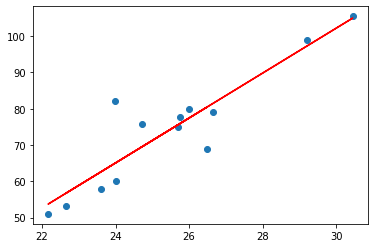

summary [-83.49506995] [[6.18982287]] 0.8259036360282349


In [14]:
plt.scatter(x2, y2)
plt.plot(x2, y2_pred, color='red')
plt.show()
print('summary', regr2.intercept_, regr2.coef_, regr2.score(x2, y2))

In [24]:
x2_ = df_corrected['loa'].values
x2_ = sm.add_constant(x2_)
y2_ = df_corrected['displacement'].values
st2 = sm.OLS(y2_, x2_)
st2 = st2.fit()
print(st2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     52.18
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.70e-05
Time:                        09:24:36   Log-Likelihood:                -42.865
No. Observations:                  13   AIC:                             89.73
Df Residuals:                      11   BIC:                             90.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.4951     21.928     -3.808      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
